# Players stats analysis 👨🏾‍💻

## 🔵1. Libraries importing

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image
import emoji
import warnings
import plotly.io as pio
from IPython.display import IFrame

warnings.filterwarnings("ignore")

## 🔵 2. Data loading

In [51]:
path = 'C:/Projects/Python/Data/players_stats.csv'
df = pd.read_csv(path)

## 🔵 3. Data Wrangling

In [52]:
pd.set_option('display.max_columns', None)
df.head(3)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shooter, ...   

                                       player_traits  pace  shooting  passing  \
0  Finesse Shot, Long Shot Taker (AI), Playmaker ...  85.0      92.0     91.0   
1  Solid Player, Finesse Shot, Outside Foot Shot,...  78.0      92.0     79.0   
2  Power Free-Kick, Flair, Long Shot Taker (AI), ...  87.0      94.0     80.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       95.0       34.0    65.0                  85                   95   
1       86.0       44.0    82.0                  71                   95   
2       88.0       34.0    75.0                  87                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   
2                          90                       80                 86   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               96           93                 94                  91   
1               85           79                 85                  70   
2               88           81                 84                  77   

   skill_ball

In [53]:
print(df.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

### 🔵 3.1 Data Cleaning

In [54]:
precleaned = (df[df.columns[:72].tolist()]
                .rename(columns = {'sofifa_id':'id','long_name':'name',
                                   'value_eur':'value','wage_eur':'wage'})
                .drop(['short_name', 'player_url','dob','club_team_id',
                      'club_jersey_number','club_loaned_from','club_joined',
                      'club_contract_valid_until','nation_team_id','nation_position',
                      'nation_jersey_number','work_rate','body_type',
                        'real_face','release_clause_eur','player_tags','player_traits'], axis=1))

In [55]:
precleaned.head(3)

id                                 name player_positions  overall  \
0  158023       Lionel Andrés Messi Cuccittini       RW, ST, CF       93   
1  188545                   Robert Lewandowski               ST       92   
2   20801  Cristiano Ronaldo dos Santos Aveiro           ST, LW       91   

   potential        value      wage  age  height_cm  weight_kg  \
0         93   78000000.0  320000.0   34        170         72   
1         92  119500000.0  270000.0   32        185         81   
2         91   45000000.0  270000.0   36        187         83   

             club_name             league_name  league_level club_position  \
0  Paris Saint-Germain          French Ligue 1           1.0            RW   
1    FC Bayern München    German 1. Bundesliga           1.0            ST   
2    Manchester United  English Premier League           1.0            ST   

   nationality_id nationality_name preferred_foot  weak_foot  skill_moves  \
0              52        Argentina           Left          4            4   
1              37           Poland          Right          4            4   
2              38         Portugal          Right          4            5   

   international_reputation  pace  shooting  passing  dribbling  defending  \
0                         5  85.0      92.0     91.0       95.0       34.0   
1                         5  78.0      92.0     79.0       86.0       44.0   
2                         5  87.0      94.0     80.0       88.0       34.0   

   physic  attacking_crossing  attacking_finishing  \
0    65.0                  85                   95   
1    82.0                  71                   95   
2    75.0                  87                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       91                 88   
1                          90                       85                 89   
2                          90                       80                 86   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               96           93                 94                  91   
1               85           79                 85                  70   
2               88           81                 84                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     80   
1                  88                     77                     79   
2                  88                     85                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                91                  94                95                86   
1                77                  93                82                90   
2                86                  94                74                94   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             72              69                94   
1             85             76              86                87   
2             95             77              77                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    44                       40                     93   
1                    81                       49                     95   
2                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                95                   75                   96   
1                81                   90                   88   
2                76                   88                   95   

   defending_marking_awareness  defending_standing_tackle  \
0                           20                         35   
1                           35                         42   
2                           24                         

In [56]:
precleaned.shape

(19239, 55)

### 🔵 3.2 Handling missing values

In [57]:
nulls = precleaned.isna().sum()
nulls[nulls>0]

value              74
wage               61
club_name          61
league_name        61
league_level       61
club_position      61
pace             2132
shooting         2132
passing          2132
dribbling        2132
defending        2132
physic           2132
dtype: int64

In [58]:
precleaned[precleaned['value'].isnull()]['club_name'].value_counts()

Yokohama FC                    2
Club Nacional de Football      1
Club Atlético Lanús            1
Newell's Old Boys              1
FC Cartagena                   1
Gimnasia y Esgrima La Plata    1
Altay SK                       1
12 de Octubre FC               1
Guangzhou FC                   1
Newport County                 1
Hokkaido Consadole Sapporo     1
Sutton United                  1
Name: club_name, dtype: int64

In [59]:
precleaned[precleaned['wage'].isna()]['club_name'].value_counts()

Series([], Name: club_name, dtype: int64)

In [60]:
cols = ['pace','shooting','passing','dribbling','defending','physic']
values = []
for col in cols:
    row = precleaned[precleaned[col].isnull()]['club_position'].value_counts()
    for i in range(len(row.values)):
        values.append([row.index[i],row.values[i],col])
        
cols = ['position','values','item']  
null_data = pd.DataFrame(values, columns = cols)
pd.pivot_table(null_data,values='values', index=['position'],columns=['item'], aggfunc=np.sum)

item      defending  dribbling  pace  passing  physic  shooting
position                                                       
GK              701        701   701      701     701       701
RES             484        484   484      484     484       484
SUB             939        939   939      939     939       939

In [61]:
players = precleaned
players[['value','wage','league_level']].fillna(0, inplace = True)

## 🔵 4. EDA of features

### 🔵 4.1 players value analysis

In [62]:
players[['value','wage']].describe().round(0).transpose()

count       mean        std     min       25%       50%        75%  \
value  19165.0  2850452.0  7613700.0  9000.0  475000.0  975000.0  2000000.0   
wage   19178.0     9018.0    19470.0   500.0    1000.0    3000.0     8000.0   

               max  
value  194000000.0  
wage      350000.0

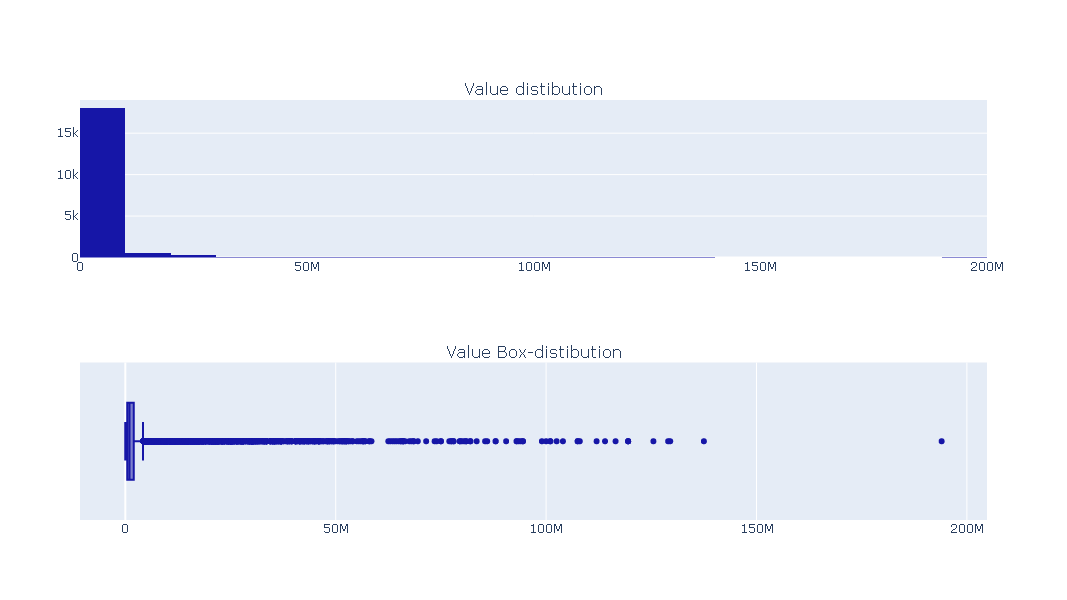

In [63]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Value distibution", "Value Box-distibution"))
    
fig.add_trace(go.Histogram(x=players["value"],nbinsx = 20, name = '',
                          marker=dict(color = '#1616A7')), row=1, col=1)

fig.add_trace(go.Box(x=players["value"], name = '',
                    marker=dict(color = '#1616A7')), row=2, col=1)

fig.update_layout(showlegend=False,height=600)

fig.show()

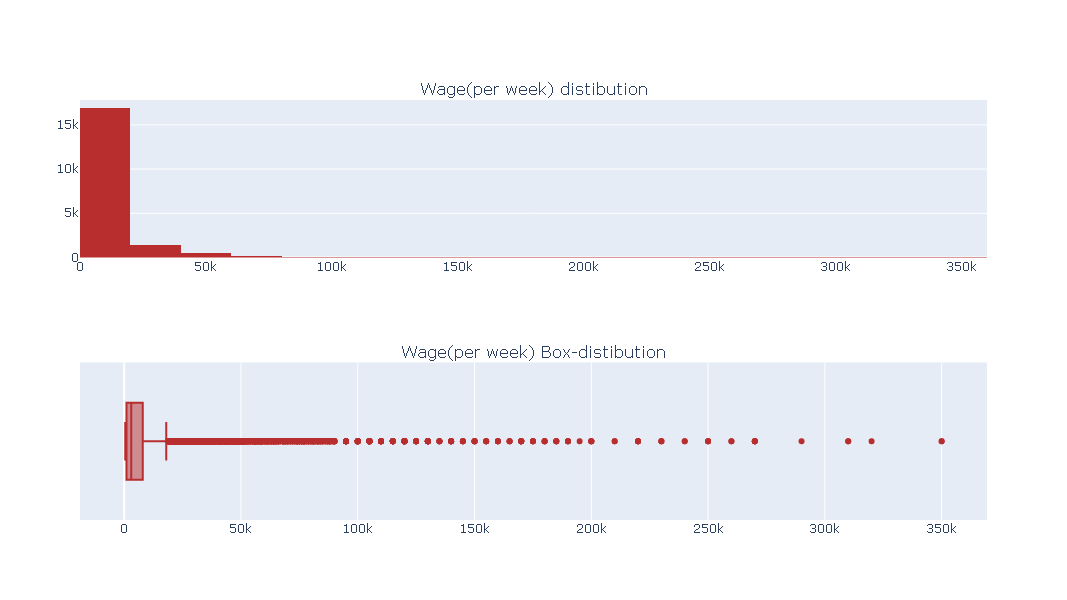

In [64]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Wage(per week) distibution", "Wage(per week) Box-distibution"))
    
fig.add_trace(go.Histogram(x=players["wage"], nbinsx = 20, name = '',
                    marker=dict(color = '#B82E2E')), row=1, col=1)

fig.add_trace(go.Box(x=players["wage"],name = '',
                    marker=dict(color = '#B82E2E')), row=2, col=1)

fig.update_layout(showlegend=False,height=600)

fig.show()

In [65]:
top_paid = players[players['value']>1000000]

In [66]:
top_paid.shape

(9033, 55)

In [67]:
top_paid[['value','wage']].describe().round(0).transpose()

count       mean         std        min        25%        50%  \
value  9033.0  5461895.0  10488944.0  1100000.0  1500000.0  2200000.0   
wage   9033.0    16689.0     26199.0      500.0     3000.0     8000.0   

             75%          max  
value  4200000.0  194000000.0  
wage     19000.0     350000.0

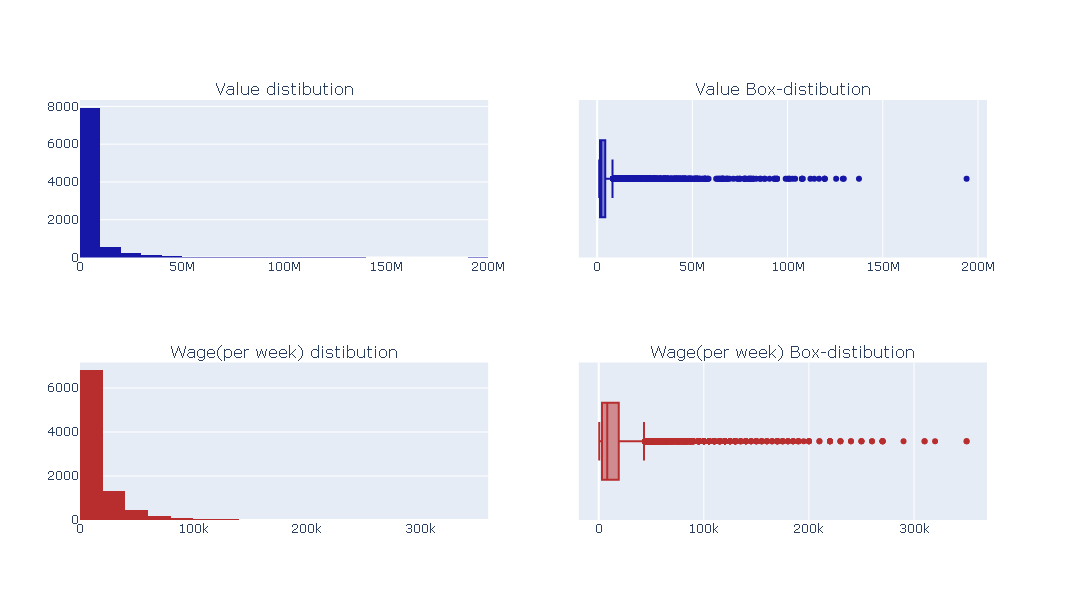

In [68]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Value distibution", "Value Box-distibution",
                                   "Wage(per week) distibution", "Wage(per week) Box-distibution"))

fig.add_trace(go.Histogram(x=top_paid["value"], nbinsx = 20, name = '',
                          marker=dict(color = '#1616A7')), row=1, col=1)

fig.add_trace(go.Box(x=top_paid["value"],name = '',
                    marker=dict(color = '#1616A7')), row=1, col=2)   
    
fig.add_trace(go.Histogram(x=top_paid["wage"], nbinsx = 20, name = '',
                          marker=dict(color = '#B82E2E')), row=2, col=1)

fig.add_trace(go.Box(x=top_paid["wage"],name = '',
                    marker=dict(color = '#B82E2E')), row=2, col=2)

fig.update_layout(showlegend=False,height=600)

fig.show()

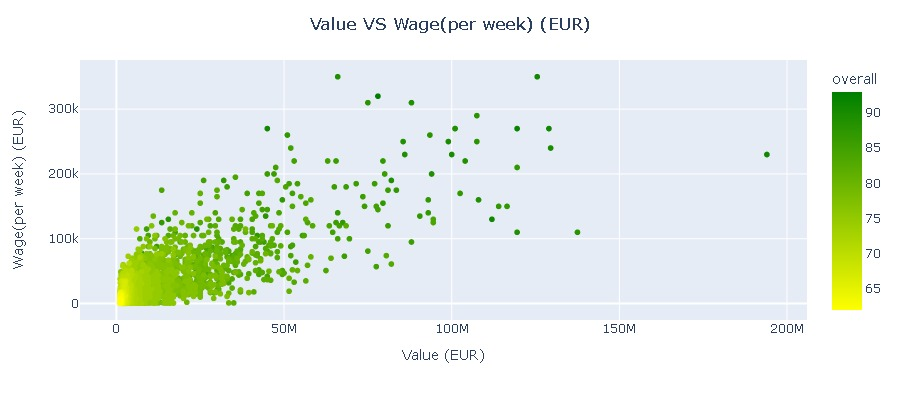

In [97]:
fig = px.scatter(top_paid, x="value", y='wage', color = 'overall',
                color_continuous_scale=['yellow','green'], hover_name = 'name')
fig.update_layout(
    title = 'Value VS Wage(per week) (EUR)',
    title_x = 0.5,
    xaxis_title = "Value (EUR)",
    yaxis_title = "Wage(per week) (EUR)")
pio.write_image(fig, file='fig.jpeg', format="jpeg", width=900, height=400)
Image('./fig.jpeg')

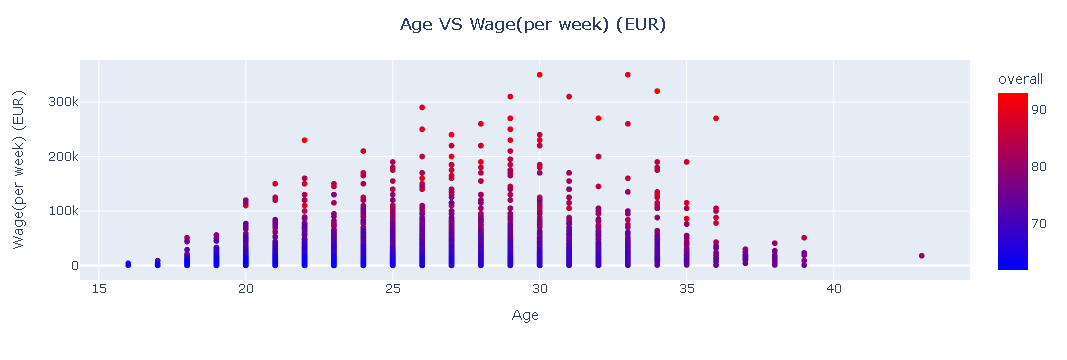

In [70]:
fig = px.scatter(top_paid, x="age", y='wage', color = 'overall',
                color_continuous_scale='bluered', hover_name = 'name')
fig.update_layout(
    title = 'Age VS Wage(per week) (EUR)',
    title_x = 0.5,
    xaxis_title = "Age",
    yaxis_title = "Wage(per week) (EUR)")
fig.show()

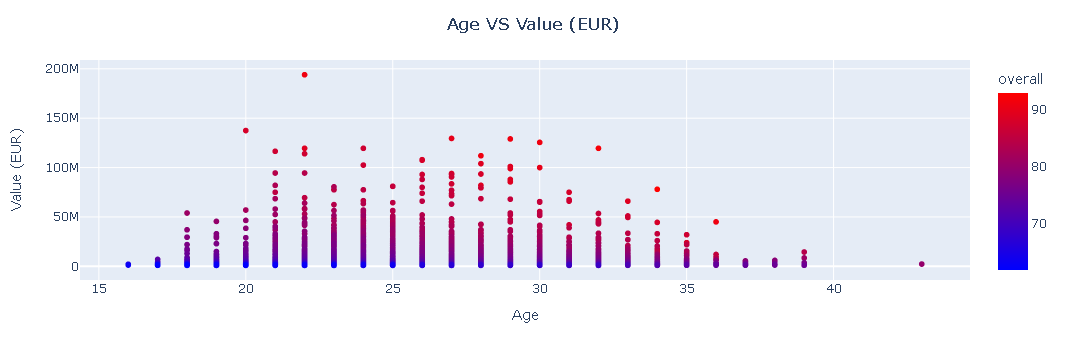

In [71]:
fig = px.scatter(top_paid, x="age", y='value', color = 'overall',
                color_continuous_scale='bluered', hover_name = 'name')
fig.update_layout(
    title = 'Age VS Value (EUR)',
    title_x = 0.5,
    xaxis_title = "Age",
    yaxis_title = "Value (EUR)")
fig.show()

In [72]:
def top_filter(data, dim, sort):
    top_ten = pd.pivot_table(data,values=[sort],index=dim, aggfunc=np.sum)
    top_ten = top_ten.sort_values(by=sort, ascending=False).reset_index()
    top_ten = list(top_ten[dim].head(10).values)
    top = players[players[dim].isin(top_ten)]
    return top

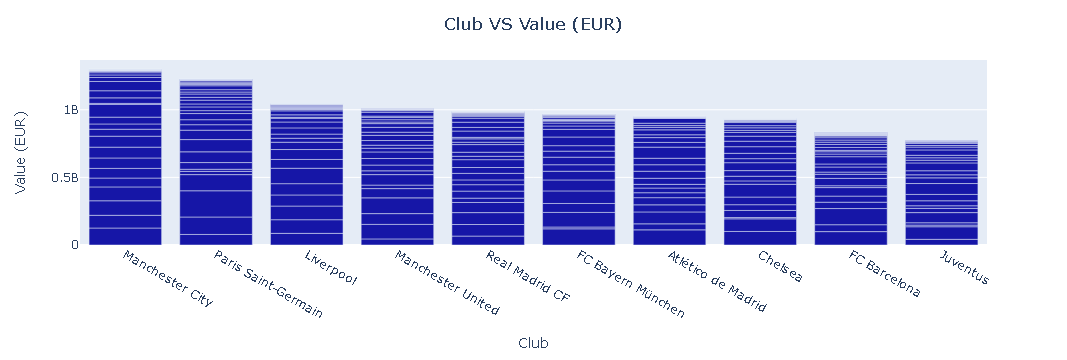

In [73]:
data = top_filter(top_paid, 'club_name', 'value')
fig = px.bar(data, x="club_name", y='value', hover_name='name',
                color_discrete_sequence=['#1616A7'])
fig.update_layout(
    title = 'Club VS Value (EUR)',
    title_x = 0.5,
    xaxis_title = "Club",
    yaxis_title = "Value (EUR)",
    xaxis={'categoryorder':'total descending'})
fig.show()

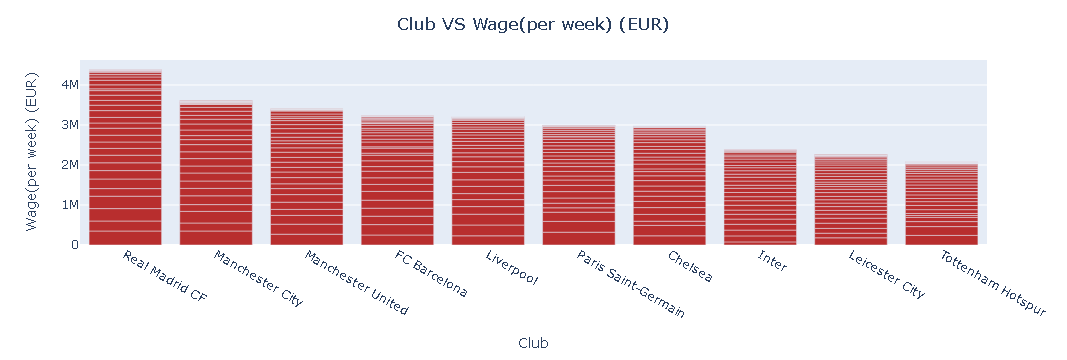

In [74]:
data = top_filter(top_paid, 'club_name', 'wage')
fig = px.bar(data, x="club_name", y='wage', hover_name='name',
                color_discrete_sequence=['#B82E2E'])
fig.update_layout(
    title = 'Club VS Wage(per week) (EUR)',
    title_x = 0.5,
    xaxis_title = "Club",
    yaxis_title = "Wage(per week) (EUR)",
    xaxis={'categoryorder':'total descending'})
fig.show()

In [76]:
# total_stats.shape

In [ ]:
# total_stats.isna().sum().sum()

In [ ]:
# total_stats.describe().round(0)

### 🔵 4.2 Wage analysis

### 🔵 4.3 Age analysis

### 🔵 4.4 Overall analysis

### 🔵 4.1 Prices analysis

### 🔵 4.1 Prices analysis

### 🔵 4.1 Prices analysis

## 🔵 5. Feature engineering

## 🔵 6. Features encoding

## 🔵 7. Data preprocessing

## 🔵 8. Data Normalization

## 🔵 9. Training / Testing data

## 🔵 10. Model selection and evaluation

In [ ]:
# df.to_sql('data', con=conn, if_exists='replace',index=False)
# conn = psycopg2.connect(conn_string)
# conn.autocommit = True

### 🔵🔵 Prices Analysis